In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

In [95]:
data =pd.read_excel("techgear_sales.xlsx")

In [96]:
df = data.copy()
df.head()

,purchase_amount,customer_age,promo_period,purchase_category
0,16.257116,46,1,Accessories
1,16.864348,40,1,Accessories
2,17.356663,36,1,Accessories
3,17.598137,43,1,Accessories
4,17.677614,40,1,Accessories


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purchase_amount    1000 non-null   float64
 1   customer_age       1000 non-null   int64  
 2   promo_period       1000 non-null   int64  
 3   purchase_category  1000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [98]:
df.shape

(1000, 4)

In [99]:
df.describe()

,purchase_amount,customer_age,promo_period
count,1000.000000,1000.000000,1000.000000
mean,713.061822,35.293000,0.313000
std,468.319453,9.378438,0.463946
min,16.257116,18.000000,0.000000
25%,151.316628,29.000000,0.000000
50%,770.891732,35.000000,0.000000
75%,1045.788433,42.000000,1.000000
max,1927.872475,66.000000,1.000000


<Axes: xlabel='purchase_amount', ylabel='Count'>

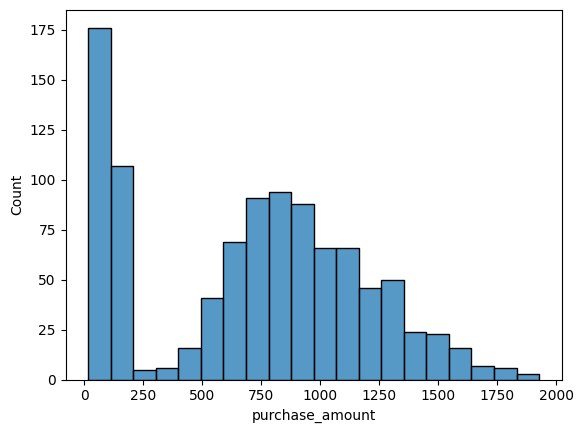

In [100]:
sns.histplot(df["purchase_amount"], bins=20)

In [101]:
df.groupby("promo_period")["purchase_amount"].count()

promo_period
0    687
1    313
Name: purchase_amount, dtype: int64

In [102]:
plus_1000 = df[df["purchase_amount"]>1000]["promo_period"].value_counts()
plus_1000

promo_period
0    227
1     62
Name: count, dtype: int64

In [103]:
plus_1000_all = df[df["purchase_amount"]>1000].count()
plus_1000_all

purchase_amount      289
customer_age         289
promo_period         289
purchase_category    289
dtype: int64

In [104]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['purchase_amount'])

# Return test statistic and p-value
stat, p_value

print(f"P-Value {p_value}")

P-Value 5.152761364712451e-20


In [113]:
# Define age group bins and labels
bins = [17, 25, 35, 45, float('inf')]
labels = ['18-25', '26-35', '36-45', '46+']

# Create age groups
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=True)
df.head()

,purchase_amount,customer_age,promo_period,purchase_category,age_group
0,16.257116,46,1,Accessories,46+
1,16.864348,40,1,Accessories,36-45
2,17.356663,36,1,Accessories,36-45
3,17.598137,43,1,Accessories,36-45
4,17.677614,40,1,Accessories,36-45


In [119]:
mean_purchase_per_group = df.groupby('age_group')['purchase_amount'].mean()
print(mean_purchase_per_group)

age_group
18-25    781.941710
26-35    726.627558
36-45    703.935997
46+      618.887435
Name: purchase_amount, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_33588\4048157437.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_purchase_per_group = df.groupby('age_group')['purchase_amount'].mean()


In [118]:
# Perform one-way ANOVA test
groups = [df[df['age_group'] == age]['purchase_amount'].dropna() for age in labels]
anova_stat, p_value = stats.f_oneway(*groups)

print(f"p_value : {p_value}")

p_value : 0.023819200086012203


In [109]:
df.to_csv('test_bin_2.csv')

In [25]:
def age_category(age):
    if 18 <= age <= 25:
        return "18-25"
    elif 25 < age <= 35:
        return "26-35"
    elif 35 < age <= 45:
        return "36-45"
    else:
        return "46+"
df["age_group"] = df["customer_age"].apply(age_category)

In [26]:
df.head()

,purchase_amount,customer_age,promo_period,purchase_category,age_group
0,16.257116,46,1,Accessories,46+
1,16.864348,40,1,Accessories,36-45
2,17.356663,36,1,Accessories,36-45
3,17.598137,43,1,Accessories,36-45
4,17.677614,40,1,Accessories,36-45


In [27]:
df.groupby("age_group")["purchase_amount"].mean()

age_group
18-25    781.941710
26-35    726.627558
36-45    703.935997
46+      618.887435
Name: purchase_amount, dtype: float64

In [36]:
df.groupby("age_group")["purchase_amount"].max()

age_group
18-25    1652.976876
26-35    1927.872475
36-45    1877.281350
46+      1595.452184
Name: purchase_amount, dtype: float64

In [37]:
df.groupby("age_group")["purchase_amount"].count()

age_group
18-25    162
26-35    355
36-45    347
46+      136
Name: purchase_amount, dtype: int64

In [35]:
df[df["age_group"]== "18-25"]["purchase_amount"].max()

np.float64(1652.97687560349)

<Axes: xlabel='age_group', ylabel='purchase_amount'>

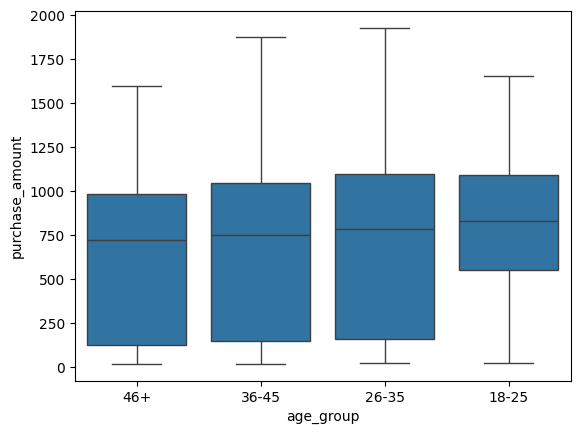

In [29]:
sns.boxplot(x = df["age_group"], y = df["purchase_amount"])

C:\ProgramData\anaconda3\envs\py3_10\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\envs\py3_10\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='age_group', ylabel='purchase_amount'>

C:\ProgramData\anaconda3\envs\py3_10\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\envs\py3_10\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


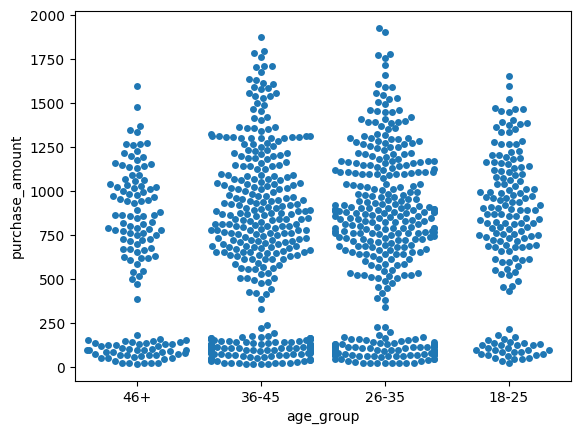

In [33]:
sns.swarmplot(x = df["age_group"], y = df["purchase_amount"])